1)

Multiply both sides of the Friedmann equation by $a^{2}$.

$a^{2}(\frac{\dot{a}}{a})^{2} = a^{2}(\frac{8 \pi G \epsilon(t)}{3c^{2}} - \frac{kc^2}{a^{2}})$

$\dot{a}^{2} = \frac{8 \pi G}{3c^{2}}a^{2} - kc^{2}$

Now, take the time derivative on both sides.

$2 \dot{a} \ddot{a} = \frac{8 \pi G}{3c^{2}}(\dot{\epsilon} a^{2}+ 2\epsilon a \dot{a})$

Divide both sides by $2\dot{a}a$

$\frac{\ddot{a}}{a} = \frac{4 \pi G}{3c^{2}}(\dot{\epsilon} \frac{a}{\dot{a}}+ 2\epsilon)$

Substitute in the acceleration Equation on the left hand side.

$-\frac{8 \pi G}{3c^{2}}[\epsilon + 2P] = \frac{4 \pi G}{3c^{2}}(\dot{\epsilon} \frac{a}{\dot{a}}+ 2\epsilon)$

Distribute terms and simplify.

$\dot{\epsilon} \frac{a}{\dot{a}} +3\epsilon + 3P = 0$

Multiply by $\frac{\dot{a}}{a}$ to result in the fluid equation.

$\dot{\epsilon}+ 3\frac{\dot{a}}{a}(\epsilon + P)= 0$


Problem 2

$(\frac{H(z)}{H_{0}})^{2} = (\Omega_{r,0}(1+z)^{4} + \Omega_{m,0}(1+z)^{3} + \Omega_{\Lambda,0} + (1- \Omega_{0})(1+z)^{2})$


$E(z) = (\Omega_{r,0}(1+z)^{4} + \Omega_{m,0}(1+z)^{3} + \Omega_{\Lambda,0} + (1- \Omega_{0})(1+z)^{2})^{\frac{1}{2}}$

$H(z) = H_{0}E(z)$

co-moving distance:
$d_{c}(z) = \frac{c}{H_{0}}\int^{z}_{0}\frac{dz'}{E(z')} = d_0\int^{z}_{0}\frac{dz'}{E(z')} $

age of universe:
$t(z) = \frac{1}{H_{0}}\int^{z}_{0}\frac{dz'}{(1+z')E(z')} = t_0\int^{z}_{0}\frac{dz'}{(1+z')E(z')}$

In [21]:
%pylab inline
from scipy.integrate import quad
def integrate_fcn(fcn, args, int_range = [0,10]):
    
    def integrate(x):
        return  quad(fcn,int_range[0],x,args=args)
    
    integrate = vectorize(integrate)
    x = np.linspace(int_range[0],int_range[1])
    y,err = integrate(x)
    return x,y

fcn = lambda z,D_0,omega_r0,omega_m0,omega_l0,omega_0: D_0*(omega_r0*(1.0+z)**4.0+omega_m0*(1.0+z)**3.0 +
            omega_l0+(1-omega_0)*(1.0+z)**2.0)**(-.5)

fcn2 = lambda z,t_0,omega_r0,omega_m0,omega_l0,omega_0: t_0*(1.0/(1.0+z))*(omega_r0*(1.0+z)**4.0+omega_m0*(1.0+z)**3.0 +
            omega_l0+(1-omega_0)*(1.0+z)**2.0)**(-.5)


Populating the interactive namespace from numpy and matplotlib


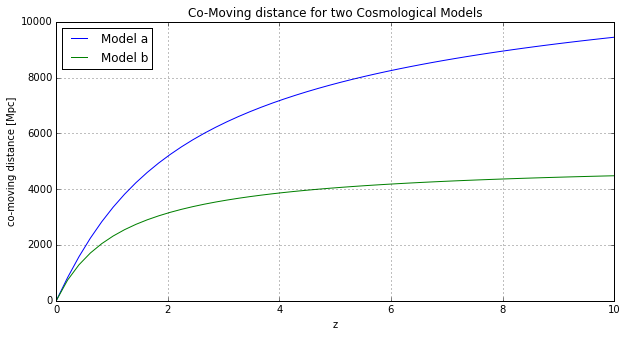

In [22]:
#The Hubble Distance
D_0 = (3e8/70.0e3) #[Mpc]

#co-moving distances:
z,d1 = integrate_fcn(fcn,(D_0,0.0,0.3,0.7,1.0))
z,d2 = integrate_fcn(fcn,(D_0,0.5,0.5,0.0,1.0))

figure(figsize=(10,5))
plot(z,d1,label='Model a')
plot(z,d2,label='Model b')
title('Co-Moving distance for two Cosmological Models')
xlabel('z')
ylabel('co-moving distance [Mpc]')
legend(loc=0)
grid()
show()

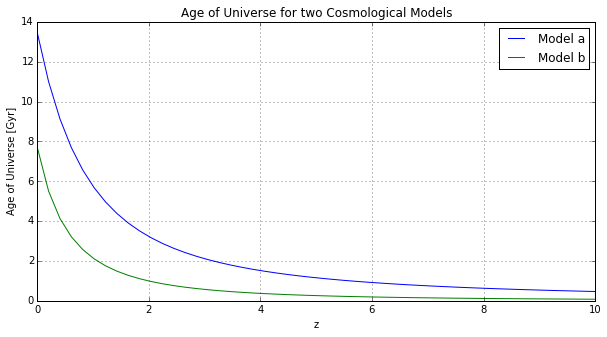

In [24]:
#Hubble Time:
T_0 = (3.086e22/70.0e3)
s_gyr = float(1e9*365*24*3600)
T_0 /= s_gyr

#Lookback Time from present
z,t1= integrate_fcn(fcn2,(T_0,0.0,0.3,0.7,1.0))
z,t2= integrate_fcn(fcn2,(T_0,0.5,0.5,0.0,1.0))

#Current Age 
t1_0 = quad(fcn2,0.0,Inf,args=(T_0,0.0,0.3,0.7,1.0))[0]
t2_0 = quad(fcn2,0.0,Inf,args=(T_0,0.5,0.5,0.0,1.0))[0]

figure(figsize=(10,5))
plot(z,t1_0-t1,label='Model a')
plot(z,t2_0-t2,label='Model b')
title('Age of Universe for two Cosmological Models')
xlabel('z')
ylabel('Age of Universe [Gyr]')
legend(loc=0)
grid()
xlim(0,10)
show()

Problem 3

Since we are considering an open matter only universe, our function for time greatly simplifies. 

$E(z) = (\Omega_{m,0}(1+z)^{3} + (1- \Omega_{0})(1+z)^{2})^{\frac{1}{2}}$

$\Omega_{0}$ is the total of all $\Omega$s, so $(1-\Omega_{0}) = (1-\Omega_{m,0})$ so

$E(z) = (\Omega_{m,0}(1+z)^{3} + (1- \Omega_{m,0})(1+z)^{2})^{\frac{1}{2}}$

To fit this model to have the same current age as the benchmark flat universe can be accomplished by a rudimentary minimization routine. Since the given universe is open $\Omega_{0} = \Omega_{m,0} \lt 1$. This limits our range of values from 0 to 1 that we can try. By simply testing lets say 50,000 values for $\Omega_{m,0}$ equally space from 0 to 1, we can determining the total age of the universe (integrating as z-> inf) for each value. By minimizing the absolute difference between these generated ages with the benchmark age value, we can approximately determine the necessary value of $\Omega_{m,0}$ that works.

In [25]:
# trial set of Omega_mass values:
omegas = np.linspace(0,1,5e4)

fcn3 = lambda z,t_0,omega_m0: t_0*(1.0/(1.0+z))*(omega_m0*(1.0+z)**3.0+(1.0-omega_m0)*(1.0+z)**2.0)**(-.5)

#Rudimentary fitting, minimization of difference between benchmark value

def find_time_diff(omegas):
    time_diff = []
    time_vals = []
    for omega in omegas:
        t_test = quad(fcn3,0.0,Inf,args=(T_0,omega))[0]               
        time_diff.append(abs(t_test-t1_0))
        time_vals.append(t_test)
    return time_diff,time_vals

In [26]:
diffs,time_vals = find_time_diff(omegas)

In [27]:
idx = argmin(diffs)
print 'Omega_m =',omegas[idx]
print 'Age of Universe =',time_vals[idx],'Gyr'
print 'Age of Benchmark Universe =',t1_0,'Gyr'

Omega_m = 0.0214604292086
Age of Universe = 13.4776207028 Gyr
Age of Benchmark Universe = 13.4776160204 Gyr


Thus $\Omega_{m,0} \approx 0.021$

A quick sanity check: Using the same method as for problem 2b, and substituting the values of model b with our fitted values we can see a good agreement.

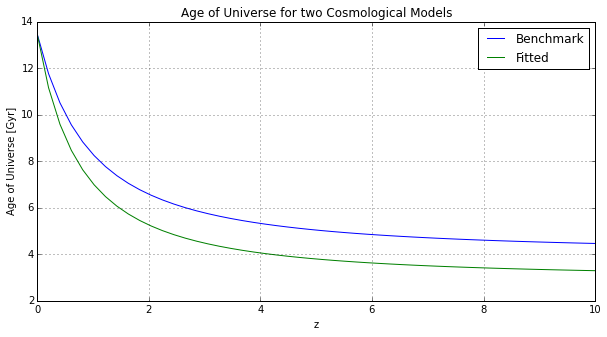

In [31]:
z,t1= integrate_fcn(fcn2,(T_0,0.0,0.3,0.7,0.0))
z,t2= integrate_fcn(fcn2,(T_0,0.0,0.5,0.0,0.5))

#Current Age 
t1_0 = quad(fcn2,0.0,Inf,args=(T_0,0.0,0.3,0.7,1.0))[0]
t2_0 = quad(fcn3,0.0,Inf,args=(T_0,omegas[idx]))[0]

figure(figsize=(10,5))
plot(z,t1_0-t1,label='Benchmark')
plot(z,t2_0-t2,label='Fitted')
title('Age of Universe for two Cosmological Models')
xlabel('z')
ylabel('Age of Universe [Gyr]')
legend(loc=0)
grid()
xlim(0,10)
show()